In [1]:
%load_ext autoreload
%autoreload 2

import subprocess
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import chess.pgn
from chess import Board, Move, Color
from chess.engine import SimpleEngine, Limit, PovScore
from chesslab.game_score import GameScore
from chesslab.collection import Collection
import numpy as np

In [2]:
engine = SimpleEngine.popen_uci("../engines/stockfish.exe", creationflags=subprocess.CREATE_NO_WINDOW)

In [24]:
collection = Collection("../data/player.pgn")

In [223]:
#collection.compute_scores_and_save(engine, overwrite=True)

game 1
.....................................................................................
118 sec
game 2
..............................................
185 sec
game 3
..........................................
249 sec
game 4
.............................................................................................................................................................
464 sec
game 5
..............................................................................................................
630 sec
game 6
......................................................................................
759 sec
game 7
..................................................
830 sec
game 8
.....................................
877 sec
game 9
............................
920 sec
game 10
....................................................
989 sec
game 11
....................................................
1068 sec
game 12
....................................................
1144 sec
game 1

In [15]:
len(collection.games)

154

In [25]:
seq = []
# user = "Magnus Carlsen"
user = "Player"
for game in collection.games:
    score = None
    if game.headers['White'] == user:
        score = float(game.headers['WhiteScore'])
    if game.headers['Black'] == user:
        score = float(game.headers['BlackScore'])
    if score is None:
        print(game.headers['White'], game.headers['Black'])
        continue

    date = datetime.datetime.strptime(game.headers['Date'], '%Y.%m.%d')
    seq.append((date, score))

seq.sort(key=lambda k:k[0])

In [26]:
df = pd.DataFrame(seq, columns=['date', 'score'])
df.set_index('date', inplace=True)

In [7]:
df_chosen = df[df.score > -100]

In [27]:
len(df)

156

In [28]:
df

,score
date,
2023-08-23,-40.81
2023-08-24,-21.78
2023-08-28,-89.76
2023-08-28,-52.92
2023-08-28,-59.25
...,...
2024-01-29,-36.78
2024-02-03,-8.38
2024-02-03,-8.41


In [29]:
average = df_chosen.resample('M').mean()

In [30]:
average.dropna(inplace=True)
average

,score
date,
2023-08-31,-51.820000
2023-09-30,-42.883810
2023-10-31,-43.581667
2023-11-30,-52.770526
2023-12-31,-47.058800
2024-01-31,-41.565909


In [22]:
x, y = zip(*seq)

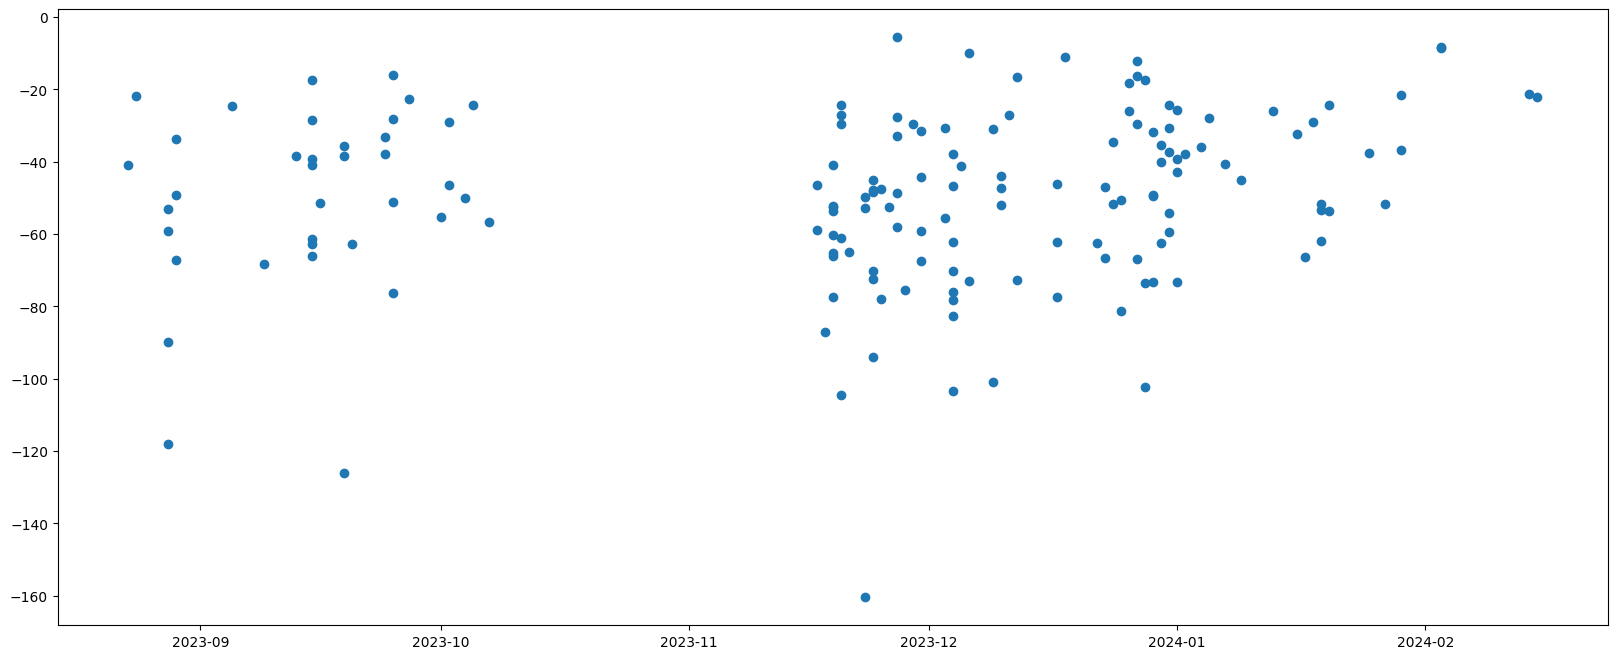

In [31]:
plt.figure(figsize=(20,8))
plt.plot(df.index, df['score'], 'o')
#plt.plot(average.index, average['score'], '-')

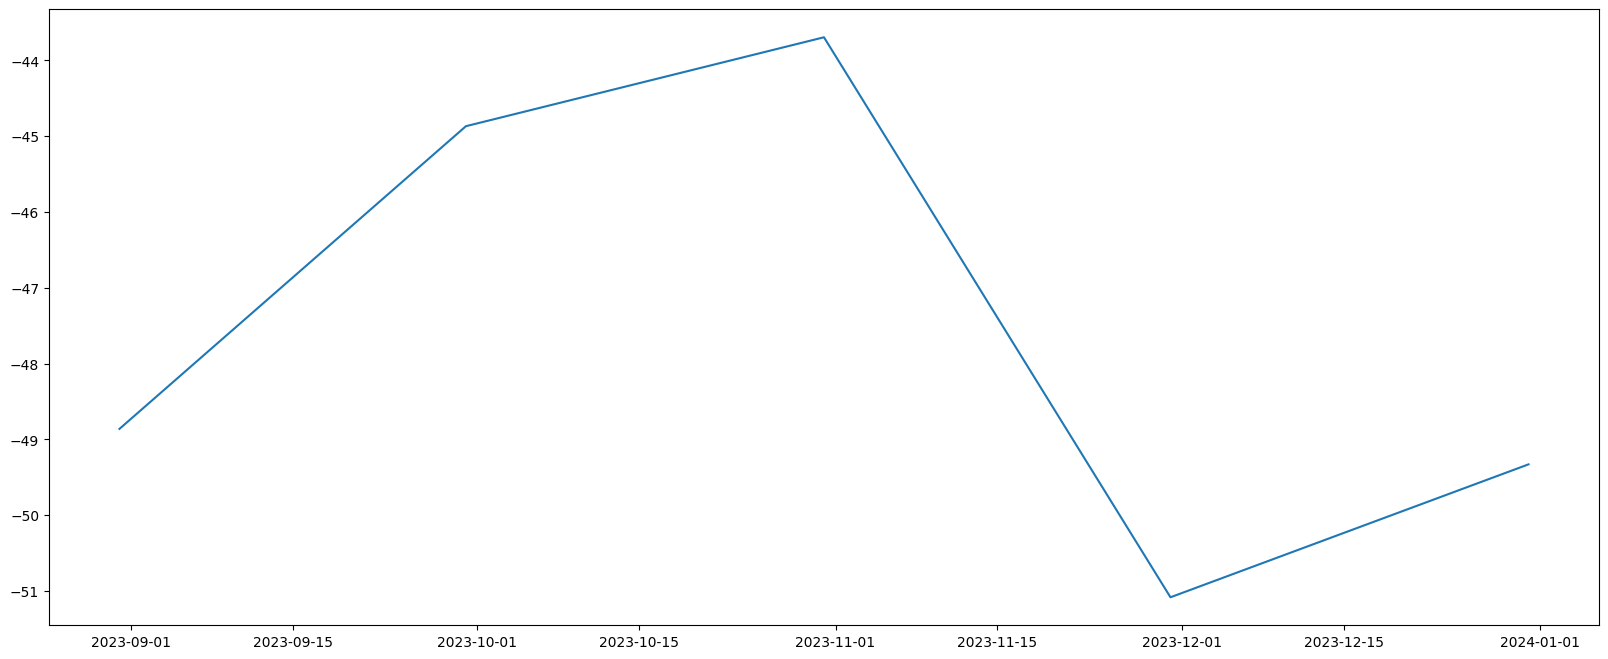

In [235]:
plt.figure(figsize=(20,8))
plt.plot(average.index, average['score'], '-')

In [152]:
from chesslab.game_score import GameScore

In [160]:
gs = GameScore(collection.games[1], engine, Limit(time=0.5))

In [161]:
gs.score()

.............................................................................................................................................................


{'white': -47.12658227848101, 'black': -130.01282051282053}